## Практическое задание по Keras / TensorFlow

Для начала установим необходимые пакеты:

In [1]:
import tensorflow_datasets as tdfs
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


### Задание 1: Предсказываем стоимость бриллиантов

Используем датасет стоимости бриллиантов из TensorFlow Datasets:

In [2]:
df = tdfs.as_dataframe(tdfs.load('diamonds',split='train'))
df.head()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/53940 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/diamonds/1.0.0.incompleteZTXTT8/diamonds-train.tfrecord*...:   0%|        …

Dataset diamonds downloaded and prepared to /root/tensorflow_datasets/diamonds/1.0.0. Subsequent calls will reuse this data.


,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0


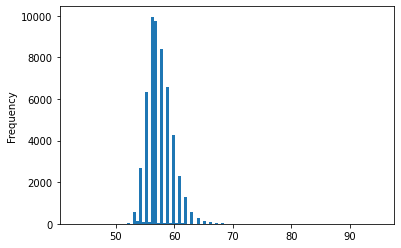

In [4]:
df['features/table'].plot.hist(bins=100)

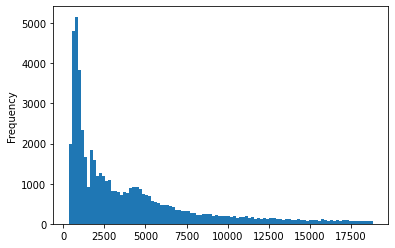

In [18]:
df['price'].plot.hist(bins=100)

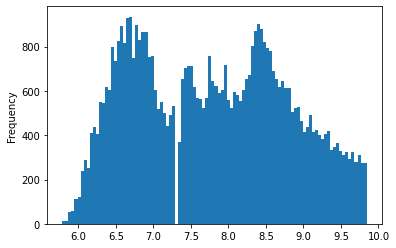

In [19]:
df['logprice'] = np.log(df['price'])
df['logprice'].plot.hist(bins=100)

In [39]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

features = [ x for x in df.columns if x.startswith('features') ]

X = df[features]
Y = df['logprice']

sc = MinMaxScaler()
X_t = sc.fit_transform(X)
Y_t = (Y-Y.min())/(Y.max()-Y.min())

In [40]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X_t,Y_t,test_size=0.15,shuffle=True)
print(train_x.shape, test_x.shape)

(45849, 9) (8091, 9)


In [47]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30,input_shape=(9,),activation='sigmoid'),
    tf.keras.layers.Dense(1,activation=None)
])
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='mse',metrics=['mae'])
h = model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=10)

Epoch 1/10
1433/1433 [==============================] - 5s 3ms/step - loss: 0.0233 - mae: 0.1162 - val_loss: 0.0048 - val_mae: 0.0551
Epoch 2/10
1433/1433 [==============================] - 3s 2ms/step - loss: 0.0041 - mae: 0.0493 - val_loss: 0.0040 - val_mae: 0.0495
Epoch 3/10
1433/1433 [==============================] - 4s 3ms/step - loss: 0.0036 - mae: 0.0451 - val_loss: 0.0032 - val_mae: 0.0434
Epoch 4/10
1433/1433 [==============================] - 3s 2ms/step - loss: 0.0030 - mae: 0.0412 - val_loss: 0.0027 - val_mae: 0.0392
Epoch 5/10
1433/1433 [==============================] - 4s 2ms/step - loss: 0.0025 - mae: 0.0372 - val_loss: 0.0022 - val_mae: 0.0350
Epoch 6/10
1433/1433 [==============================] - 4s 2ms/step - loss: 0.0021 - mae: 0.0331 - val_loss: 0.0018 - val_mae: 0.0307
Epoch 7/10
1433/1433 [==============================] - 3s 2ms/step - loss: 0.0018 - mae: 0.0299 - val_loss: 0.0016 - val_mae: 0.0291
Epoch 8/10
1433/1433 [==============================] - 3s 2ms

In [42]:
for price in [200,2000,20000]:
  mae = 0.035
  logprice = np.log(price)
  error = np.exp(logprice+mae)-price
  print(f"price = {price}, error = {error}")

price = 200, error = 7.123941759924605
price = 2000, error = 71.23941759924628
price = 20000, error = 712.3941759924528


**Задание:**
1. Разбейте датасет на обучающую и тестовую выборки
2. Обучите простую предсказательную Keras-модель для оценки стоимости, посчитайте метрику ошибки (MSE, MAE)
3. Подумайте, как улучшить результат. Для этого, посмотрите на гистограмму стоимости бриллиантов, чтобы оценить распределение.


### Задание 2: Классифицируем рукописные цифры

Используйте MNIST Dataset и посмотрите, какой максимальной точности вы сможете добиться:

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


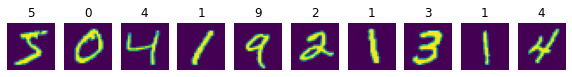

In [10]:
fix, ax = plt.subplots(1,10,figsize=(10,3))
for a,i,l in zip(ax,train_x,train_y):
   a.imshow(i)
   a.set_title(l)
   a.axis('off')


In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10,input_shape=(784,),activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [24]:
tf.keras.utils.to_categorical(train_y)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [25]:
model.fit(train_x.reshape(-1,784),tf.keras.utils.to_categorical(train_y))

1875/1875 [==============================] - 4s 2ms/step - loss: 9.6580 - acc: 0.8398


Чуть упрощаем:

In [45]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [46]:
hist = model.fit(train_x/255.0,train_y,validation_data=(test_x/255.0,test_y),epochs=6)

Epoch 1/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4747 - acc: 0.8745 - val_loss: 0.3058 - val_acc: 0.9179
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3044 - acc: 0.9150 - val_loss: 0.2839 - val_acc: 0.9206
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - acc: 0.9205 - val_loss: 0.2734 - val_acc: 0.9225
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2735 - acc: 0.9236 - val_loss: 0.2736 - val_acc: 0.9233
Epoch 5/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - acc: 0.9259 - val_loss: 0.2672 - val_acc: 0.9259
Epoch 6/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2618 - acc: 0.9278 - val_loss: 0.2671 - val_acc: 0.9257


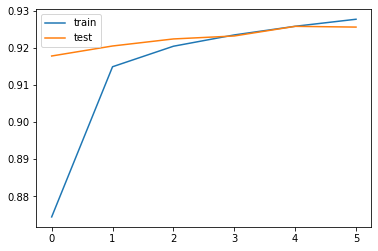

In [47]:
plt.plot(hist.history['acc'],label='train')
plt.plot(hist.history['val_acc'],label='test')
plt.legend()

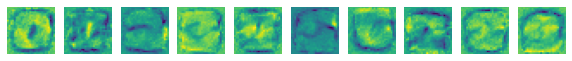

In [62]:
W = model.layers[-1].weights[0]
fig,ax = plt.subplots(1,10,figsize=(10,3))
for a,i in zip(ax,W.numpy().T):
  a.imshow(i.reshape(28,28))
  a.axis('off')

In [44]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
model.summary()
hist = model.fit(train_x/255.0,train_y,validation_data=(test_x/255.0,test_y),epochs=6)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2705 - acc: 0.9225 - val_loss: 0.1480 - val_acc: 0.9577
Epoch 2/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1203 - acc: 0.9650 - val_loss: 0.1070 - val_acc: 0.9675
Epoch 3/6
1875/1875 [===========================

#### Оптимизация гиперпараметров

In [4]:
train_xt = tf.constant(train_x/255.0)
train_yt = tf.constant(train_y)
test_xt = tf.constant(test_x/255.0)
test_yt = tf.constant(test_y)

for ac in ['relu','tanh','sigmoid']:
  for n in [10,100,1000,5000]:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(n,activation=ac),
        tf.keras.layers.Dense(10,activation='softmax')
    ])
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
    hist = model.fit(train_xt,train_yt,validation_data=(test_xt,test_yt),epochs=3,verbose=0)
    acc = max(hist.history['val_acc'])
    print(f"ac={ac}, n={n}, val_acc={acc}")

ac=relu, n=10, val_acc=0.9319999814033508
ac=relu, n=100, val_acc=0.9736999869346619
ac=relu, n=1000, val_acc=0.9797000288963318
ac=relu, n=5000, val_acc=0.9793000221252441
ac=tanh, n=10, val_acc=0.9264000058174133
ac=tanh, n=100, val_acc=0.9689000248908997
ac=tanh, n=1000, val_acc=0.9724000096321106
ac=tanh, n=5000, val_acc=0.9656000137329102
ac=sigmoid, n=10, val_acc=0.9125000238418579
ac=sigmoid, n=100, val_acc=0.958899974822998
ac=sigmoid, n=1000, val_acc=0.9732000231742859
ac=sigmoid, n=5000, val_acc=0.9715999960899353


Возьмём лучшую модель:

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
model.summary()
hist = model.fit(train_x/255.0,train_y,validation_data=(test_x/255.0,test_y),epochs=6)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 1000)              785000    
                                                                 
 dense_33 (Dense)            (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1846 - acc: 0.9445 - val_loss: 0.0998 - val_acc: 0.9678
Epoch 2/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0757 - acc: 0.9766 - val_loss: 0.0899 - val_acc: 0.9728
Epoch 3/6
1875/1875 [========================

<BarContainer object of 10 artists>

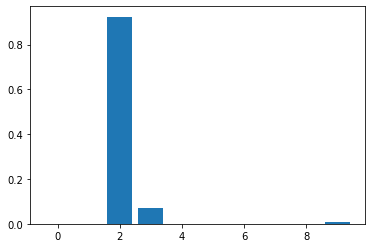

In [18]:
plt.bar(range(10),model(tf.random.normal(shape=(1,28,28)))[0])

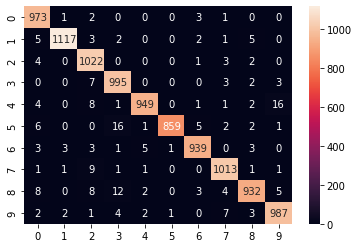

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

test_p = tf.argmax(model(test_x),axis=1)
cm = confusion_matrix(test_y, test_p)
sns.heatmap(cm,annot=True,fmt='g')

In [ ]:
W = model.layers[1].weights[0]
fig,ax = plt.subplots(5,10,figsize=(15,5))
for i in range(10):
  for j in range(5):
    ax[j,i].imshow(W[:,j*5+i].numpy().reshape(28,28))
    ax[j,i].axis('off')
plt.tight_layout()

**Задание:**
1. Постройте классификатор и оцените его точность на тестовом датасете.
1. Постройте матрицу ошибок классификации и сделайте выводы
1. Постройте матрицу весов модели для однослойного персептрона
1. Попробуйте обучить двухслойный персептрон с различными функциями 
активации и с различным количеством нейронов на скрытом слое и посмотрите, как меняется ошибка в зависимости от гиперпараметров.


### Задание 3:

Проделайте предыдущее задание с датасетом [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist):


4422102/4422102 [==============================] - 0s 0us/step


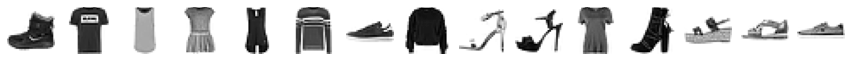

In [30]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

fig,ax = plt.subplots(1,15,figsize=(15,3))
for i,(a,im) in enumerate(zip(ax,x_train)):
  a.imshow(im,cmap='gray_r')
  a.axis('off')

Epoch 1/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5233 - acc: 0.8192 - val_loss: 0.4305 - val_acc: 0.8485
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3951 - acc: 0.8608 - val_loss: 0.4190 - val_acc: 0.8471
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3591 - acc: 0.8706 - val_loss: 0.3836 - val_acc: 0.8625
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3367 - acc: 0.8792 - val_loss: 0.3943 - val_acc: 0.8582
Epoch 5/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3195 - acc: 0.8838 - val_loss: 0.3550 - val_acc: 0.8719
Epoch 6/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3041 - acc: 0.8890 - val_loss: 0.3698 - val_acc: 0.8681


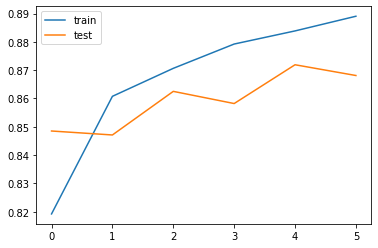

In [43]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
hist = model.fit(x_train/255.0,y_train,validation_data=(x_test/255.0,y_test),epochs=6)
plt.plot(hist.history['acc'],label='train')
plt.plot(hist.history['val_acc'],label='test')
plt.legend()

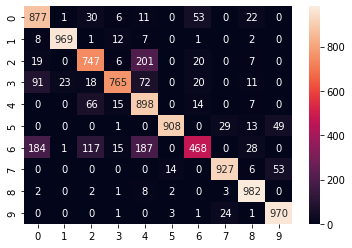

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

test_p = tf.argmax(model(x_test),axis=1)
cm = confusion_matrix(y_test, test_p)
sns.heatmap(cm,annot=True,fmt='g')

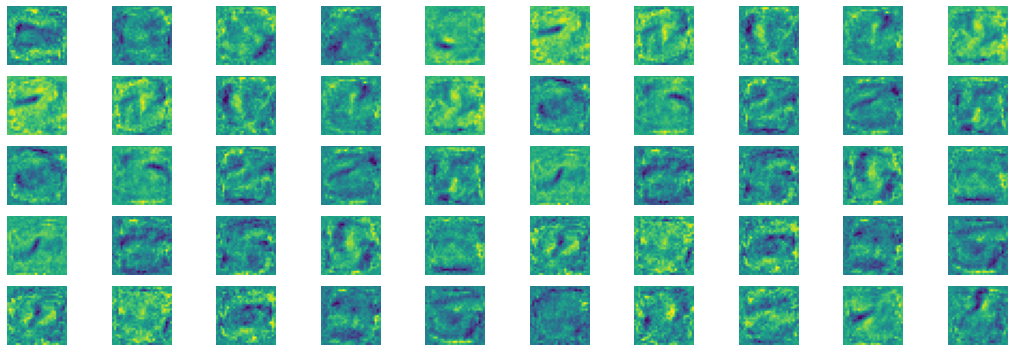

In [42]:
W = model.layers[1].weights[0]
fig,ax = plt.subplots(5,10,figsize=(15,5))
for i in range(10):
  for j in range(5):
    ax[j,i].imshow(W[:,j*5+i].numpy().reshape(28,28))
    ax[j,i].axis('off')
plt.tight_layout()